# <center>Índice de Calidad del Aire</center>

http://www.aire.cdmx.gob.mx/estadisticas-consultas/descargas/INDICExls-csv.pdf

http://www.aire.cdmx.gob.mx/descargas/monitoreo/normatividad/NADF-009-AIRE-2017.pdf

http://www.aire.cdmx.gob.mx/default.php?opc=%27aqBjnmU=%27

In [1]:
%reset -f # Elimina todas las variables del entorno

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  elimina, please run `%reset?` for details
Don't know how to reset  todas, please run `%reset?` for details
Don't know how to reset  las, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details
Don't know how to reset  del, please run `%reset?` for details
Don't know how to reset  entorno, please run `%reset?` for details


In [2]:
#%matplotlib qt

In [3]:
%pip install missingno 
# Libreria para la visualización de los valores nulos


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Seleccionar las variables de interes y unir los datasets

In [12]:

# Define la ruta de la carpeta donde están los archivos CSV
# La ruta es una cadena de texto cruda (raw string) que permite incluir barras invertidas sin que se interpreten como caracteres de escape
carpeta = r'./Original_dataset'

# Lista para almacenar los DataFrames individuales
# Aquí se va a ir guardando cada DataFrame que se genere a partir de los archivos CSV
dataframes = []

# Leer y almacenar las columnas relevantes de cada archivo CSV
# Se recorre cada archivo en la carpeta especificada
for archivo in os.listdir(carpeta):
    # Verifica que el archivo termine en '.csv' para asegurarse de que estamos leyendo solo archivos CSV
    if archivo.endswith('.csv'):
        # Leer el archivo CSV
        # Utiliza pandas para leer el archivo CSV y almacenarlo en un DataFrame
        df = pd.read_csv(os.path.join(carpeta, archivo))
        
        # Seleccionar las columnas relevantes
        # Se define una lista con las columnas que queremos mantener del DataFrame original
        columnas_relevantes = ['Fecha', 'Hora']
        # Añadimos las columnas específicas de cada zona que queremos conservar
        for zona in ['Noroeste', 'Noreste', 'Centro', 'Suroeste', 'Sureste']:
            columnas_relevantes.append(f'{zona} PM10')
            columnas_relevantes.append(f'{zona} monóxido de carbono')
        
        # Filtrar el DataFrame para conservar solo las columnas relevantes
        # Creamos un nuevo DataFrame que solo contiene las columnas especificadas en la lista 'columnas_relevantes'
        df_relevante = df[columnas_relevantes]
        
        # Añadir el DataFrame filtrado a la lista
        # Se agrega el DataFrame filtrado a la lista 'dataframes'
        dataframes.append(df_relevante)

# Combinar todos los DataFrames en uno solo
# Utilizamos pandas para concatenar todos los DataFrames de la lista 'dataframes' en un único DataFrame
data_combinada = pd.concat(dataframes, ignore_index=True)
# Concatenar por columnas result = pd.concat([df1, df2], axis=1)

# Guardar el DataFrame combinado en un nuevo archivo CSV
# Guardamos el DataFrame combinado en un archivo CSV llamado 'data_combinada.csv'
data_combinada.to_csv('data_combinada.csv', index=False)

# Mostrar las primeras filas del DataFrame combinado
# Mostramos las primeras filas del DataFrame combinado para verificar que se ha creado correctamente
data_combinada.head()


,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
0,01/01/2016,1,108,13.0,117,16.0,107,16.0,67,9.0,107.0,11.0
1,01/01/2016,2,110,13.0,122,18.0,107,17.0,70,9.0,107.0,12.0
2,01/01/2016,3,113,14.0,124,19.0,109,18.0,76,10.0,108.0,13.0
3,01/01/2016,4,115,14.0,126,19.0,110,19.0,83,10.0,107.0,14.0
4,01/01/2016,5,116,15.0,127,20.0,112,17.0,90,11.0,108.0,14.0


# 2. EDA

In [13]:
%pip install statsmodels

^C
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
# Cargar el DataFrame
df = pd.read_csv('data_combinada.csv')
df.describe().round() # Podemos redondear los valores de salida 

,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
count,69323.0,69323.0,69264.0,69323.0,69264.0,69323.0,69264.0,69323.0,69264.0,69313.0,69264.0
mean,12.0,68.0,2.0,75.0,3.0,58.0,3.0,42.0,1.0,58.0,2.0
std,7.0,25.0,20.0,32.0,20.0,24.0,20.0,20.0,20.0,41.0,20.0
min,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
25%,7.0,48.0,4.0,51.0,4.0,40.0,4.0,30.0,3.0,40.0,4.0
50%,12.0,65.0,5.0,77.0,5.0,55.0,5.0,40.0,4.0,60.0,5.0
75%,18.0,88.0,7.0,102.0,8.0,74.0,8.0,52.0,5.0,84.0,7.0
max,24.0,142.0,43.0,166.0,64.0,140.0,52.0,115.0,25.0,132.0,36.0


In [16]:
# Reemplazar valores -99 con NaN
df.replace(-99, np.nan, inplace=True)

# Asegurarse de que a partir de la segunda columna todos los valores sean numéricos
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la columna 'Fecha' al formato específico
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')

# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df[df['Fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)


In [17]:

# Formatear la columna 'Fecha' al formato 'YYYY-MM-DD'
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

# Renombrar columnas
short_column_names = {
    'Noroeste PM10': 'NO-PM10',
    'Noroeste monóxido de carbono': 'NO-CO',
    'Noreste PM10': 'NE-PM10',
    'Noreste monóxido de carbono': 'NE-CO',
    'Centro PM10': 'CE-PM10',
    'Centro monóxido de carbono': 'CE-CO',
    'Suroeste PM10': 'SO-PM10',
    'Suroeste monóxido de carbono': 'SO-CO',
    'Sureste PM10': 'SE-PM10',
    'Sureste monóxido de carbono': 'SE-CO'
}
df.rename(columns=short_column_names, inplace=True)

# Corregir las horas inválidas
df['Hora'] = df['Hora'] - 1

# Crear columna Fecha_Hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'].astype(str) + ':00:00')
df.set_index('Fecha_Hora', inplace=True)
df.sort_index(inplace=True)

In [18]:
df.head()


,Fecha,Hora,NO-PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-PM10,SO-CO,SE-PM10,SE-CO
Fecha_Hora,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0
2016-01-01 01:00:00,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0
2016-01-01 02:00:00,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0
2016-01-01 03:00:00,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0
2016-01-01 04:00:00,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0


In [19]:
df.describe()

,Hora,NO-PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-PM10,SO-CO,SE-PM10,SE-CO
count,69323.000000,69248.000000,66645.000000,68898.000000,66728.000000,69299.000000,66869.000000,69035.000000,66637.000000,66649.000000,66564.000000
mean,11.499834,68.102082,5.946163,75.792635,7.008842,58.192499,6.246975,42.509828,4.523988,64.173116,5.715236
std,6.921911,24.447218,3.294260,28.829598,4.058057,23.352578,3.439650,17.345446,2.133077,26.483766,3.029051
min,0.000000,11.000000,0.000000,9.000000,0.000000,9.000000,0.000000,6.000000,0.000000,4.000000,0.000000
25%,6.000000,48.000000,4.000000,51.000000,5.000000,40.000000,4.000000,30.000000,3.000000,43.000000,4.000000
50%,11.000000,65.000000,5.000000,77.000000,6.000000,55.000000,5.000000,40.000000,4.000000,63.000000,5.000000
75%,17.000000,88.000000,7.000000,102.000000,9.000000,74.000000,8.000000,52.000000,5.000000,86.000000,7.000000
max,23.000000,142.000000,43.000000,166.000000,64.000000,140.000000,52.000000,115.000000,25.000000,132.000000,36.000000


In [20]:
df.isnull().sum()

Fecha         0
Hora          0
NO-PM10      75
NO-CO      2678
NE-PM10     425
NE-CO      2595
CE-PM10      24
CE-CO      2454
SO-PM10     288
SO-CO      2686
SE-PM10    2674
SE-CO      2759
dtype: int64

<Axes: >

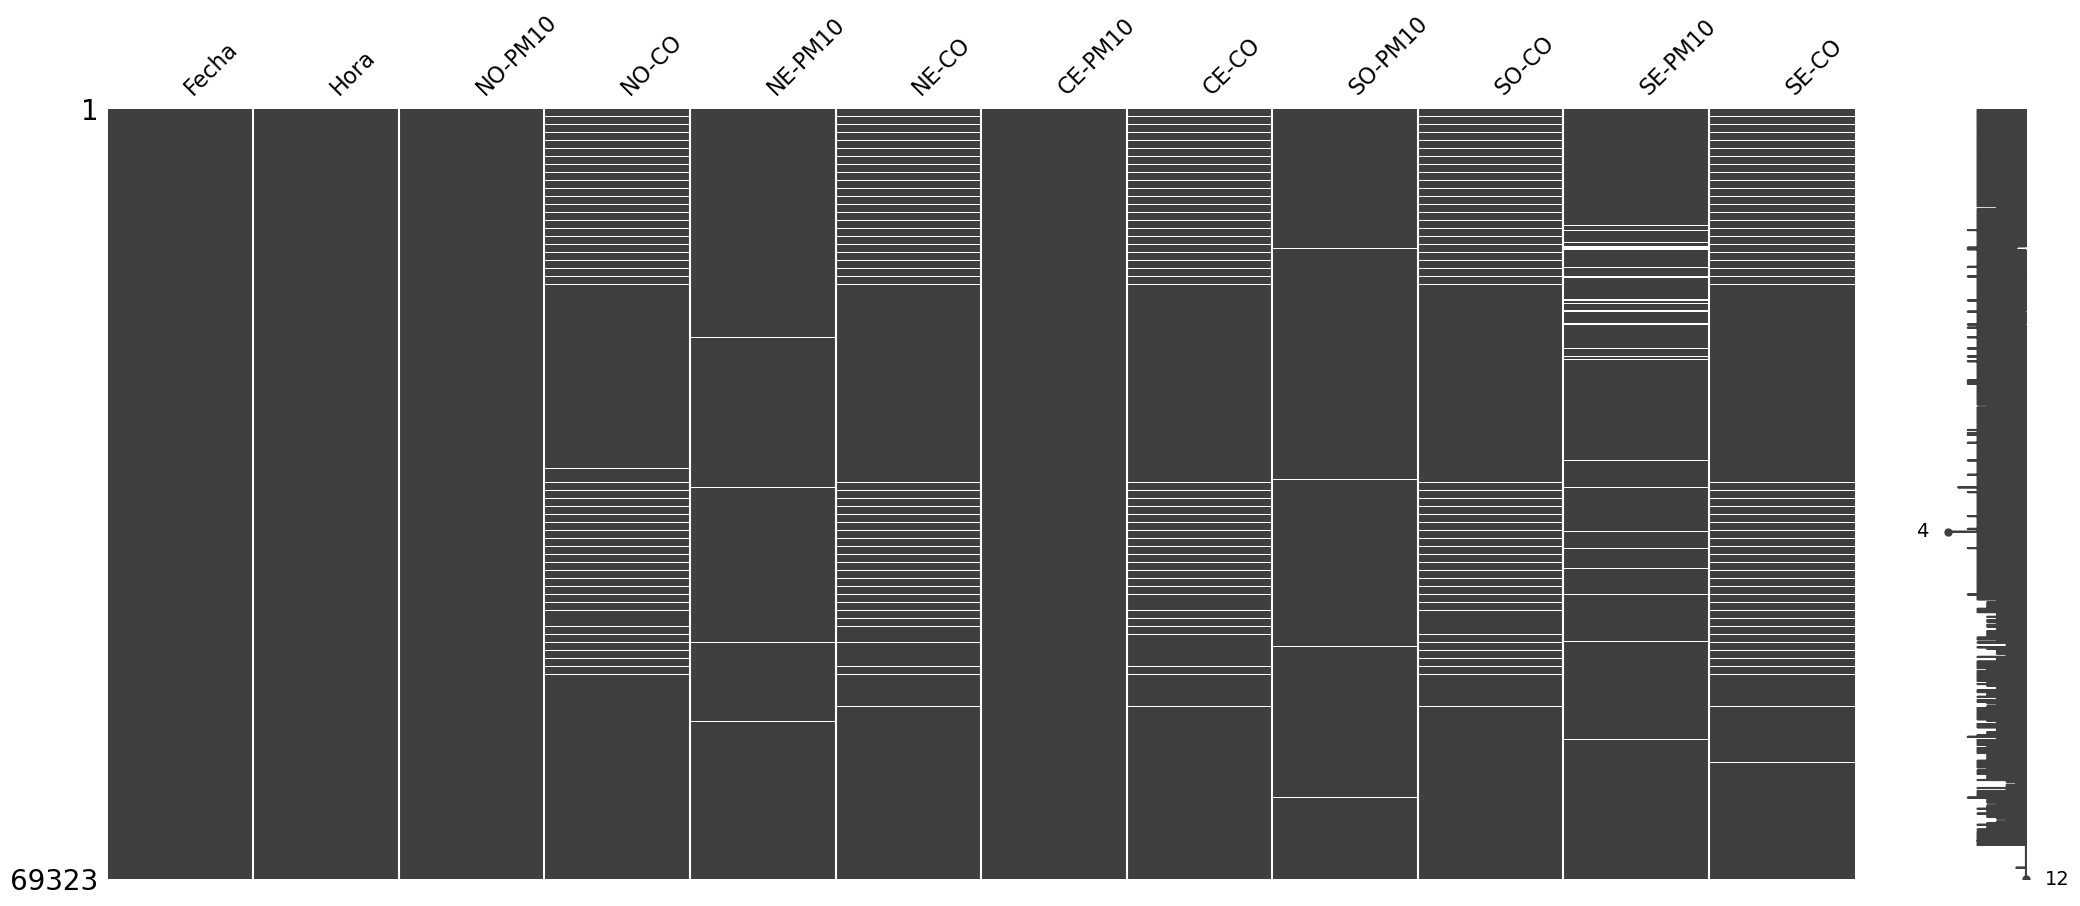

In [21]:
msno.matrix(df) # Visualización de los datos nulos

In [22]:

# Descripción por año
df['Año'] = df.index.year
df['Mes'] = df.index.month

# Calcular valores nulos por año
nulos_por_año = df.isnull().groupby(df['Año']).sum()

# Calcular valores nulos por mes para cada año
nulos_por_mes = df.isnull().groupby([df['Año'], df['Mes']]).sum()

In [23]:
nulos_por_año

,Fecha,Hora,NO-PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-PM10,SO-CO,SE-PM10,SE-CO,Año,Mes
Año,,,,,,,,,,,,,,
2016,0,0,0,366,0,366,0,366,0,366,31,366,0,0
2017,0,0,2,370,67,363,0,367,46,362,883,369,0,0
2018,0,0,0,364,179,364,0,364,0,364,719,370,0,0
2019,0,0,47,316,21,307,0,307,36,307,314,301,0,0
2020,0,0,26,374,43,373,5,375,22,379,321,375,0,0
2021,0,0,0,343,76,271,0,253,107,297,120,353,0,0
2022,0,0,0,318,39,330,0,291,48,348,201,368,0,0
2023,0,0,0,168,0,162,19,72,29,204,75,198,0,0
2024,0,0,0,59,0,59,0,59,0,59,10,59,0,0


In [24]:
nulos_por_mes

Fecha  Hora  NO-PM10  NO-CO  NE-PM10  NE-CO  CE-PM10  CE-CO  \
Año  Mes                                                                
2016 1        0     0        0     30        0     30        0     30   
     2        0     0        0     30        0     30        0     30   
     3        0     0        0     30        0     30        0     30   
     4        0     0        0     30        0     30        0     30   
     5        0     0        0     30        0     30        0     30   
...         ...   ...      ...    ...      ...    ...      ...    ...   
2024 2        0     0        0     28        0     28        0     28   
     3        0     0        0      0        0      0        0      0   
     4        0     0        0      0        0      0        0      0   
     5        0     0        0      0        0      0        0      0   
     6        0     0        0      0        0      0        0      0   

          SO-PM10  SO-CO  SE-PM10  SE-CO  Año  Mes  
Año  Mes                                            
2016 1          0     30        0     30    0    0  
     2          0     30        0     30    0    0  
     3          0     30        5     30    0    0  
     4          0     30        0     30    0    0  
     5          0     30        0     30    0    0  
...           ...    ...      ...    ...  ...  ...  
2024 2          0     28        0     28    0    0  
     3          0      0        0      0    0    0  
     4          0      0        0      0    0    0  
     5          0      0       10      0    0    0  
     6          0      0        0      0    0    0  

[95 rows x 14 columns]

In [ ]:
import matplotlib.pyplot as plt 

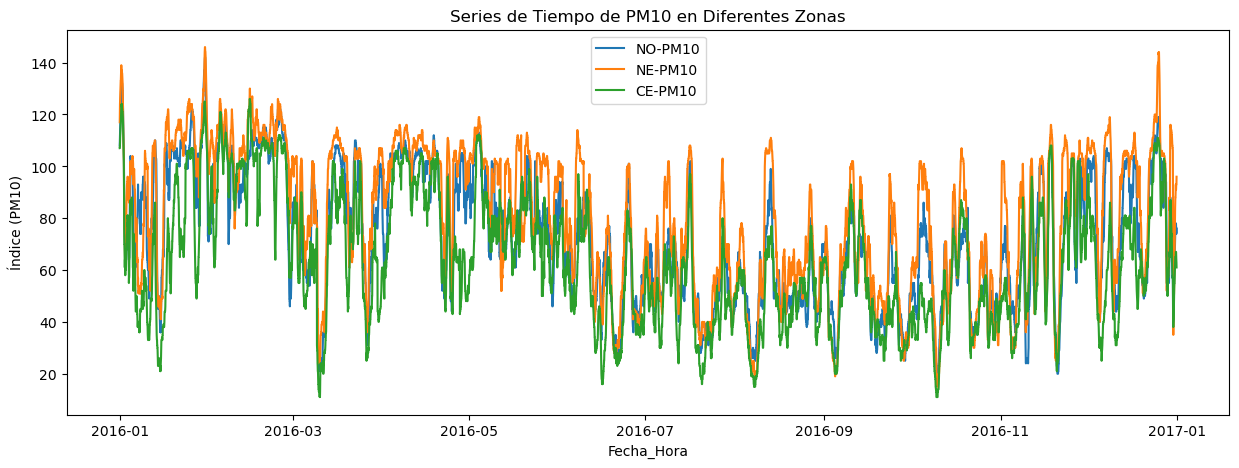

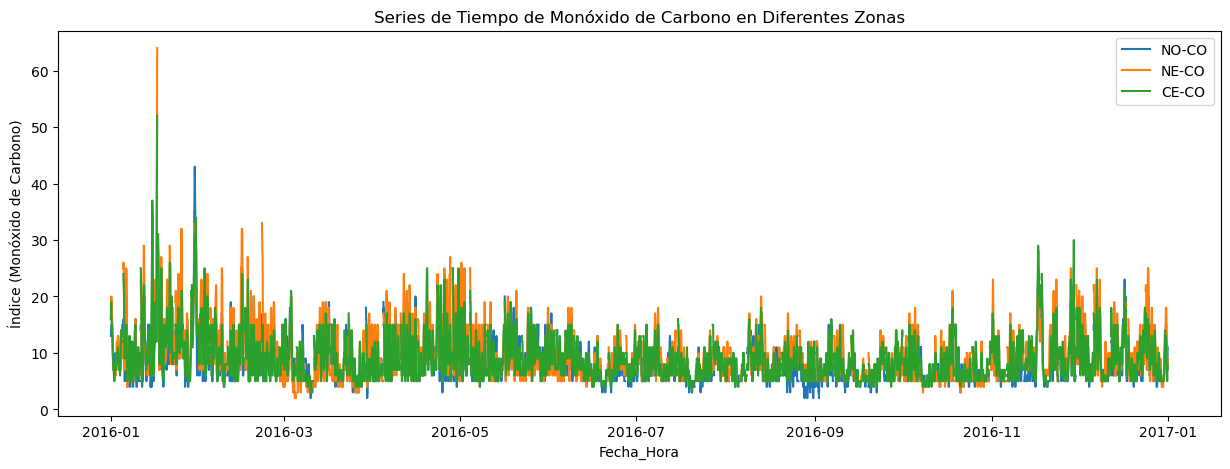

In [25]:
# Función para graficar series de tiempo con rango de fechas y zonas específicas
def plot_time_series(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    # Si se proporcionan fechas de inicio y fin, filtrar el DataFrame para ese rango de fechas
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    # Iterar sobre cada zona especificada en la lista de zonas
    for zone in zones:
        # Crear el nombre de la columna combinando la zona y la variable
        column = f"{zone}-{variable}"
        
        # Verificar si la columna existe en el DataFrame
        if column in df.columns:
            # Graficar la serie de tiempo de la columna
            plt.plot(df.index, df[column], label=column)
        else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha_Hora')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()

# Definir las zonas específicas que se desean graficar para PM10
zones_to_plot = ['NO', 'NE', 'CE']

# Llamar a la función para graficar PM10 en las zonas específicas con el rango de fechas indicado
plot_time_series(df, 'PM10', zones_to_plot, 'Índice (PM10)', 'Series de Tiempo de PM10 en Diferentes Zonas', start_date='2016-01-01', end_date='2016-12-31')

# Definir las zonas específicas que se desean graficar para CO
zones_to_plot = ['NO', 'NE', 'CE']

# Llamar a la función para graficar CO en las zonas específicas con el rango de fechas indicado
plot_time_series(df, 'CO', zones_to_plot, 'Índice (Monóxido de Carbono)', 'Series de Tiempo de Monóxido de Carbono en Diferentes Zonas', start_date='2016-01-01', end_date='2016-12-31')


In [26]:
# Identificar columnas para PM10 y CO
pm10_columns = [col for col in df.columns if 'PM10' in col]
co_columns = [col for col in df.columns if 'CO' in col]

# Crear nuevas columnas para promedios
df['MEAN-PM10'] = df[pm10_columns].mean(axis=1, skipna=True)
df['MEAN-CO'] = df[co_columns].mean(axis=1, skipna=True)

In [27]:
df

,Fecha,Hora,NO-PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-PM10,SO-CO,SE-PM10,SE-CO,Año,Mes,MEAN-PM10,MEAN-CO
Fecha_Hora,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0,2016,1,101.2,13.0
2016-01-01 01:00:00,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0,2016,1,103.2,13.8
2016-01-01 02:00:00,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0,2016,1,106.0,14.8
2016-01-01 03:00:00,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0,2016,1,108.2,15.2
2016-01-01 04:00:00,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0,2016,1,110.6,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 12:00:00,2024-06-29,12,39.0,8.0,39.0,7.0,35.0,8.0,23.0,7.0,26.0,6.0,2024,6,32.4,7.2
2024-06-29 13:00:00,2024-06-29,13,39.0,8.0,39.0,7.0,35.0,8.0,23.0,7.0,28.0,6.0,2024,6,32.8,7.2
2024-06-29 14:00:00,2024-06-29,14,39.0,7.0,39.0,6.0,35.0,7.0,23.0,6.0,28.0,6.0,2024,6,32.8,6.4


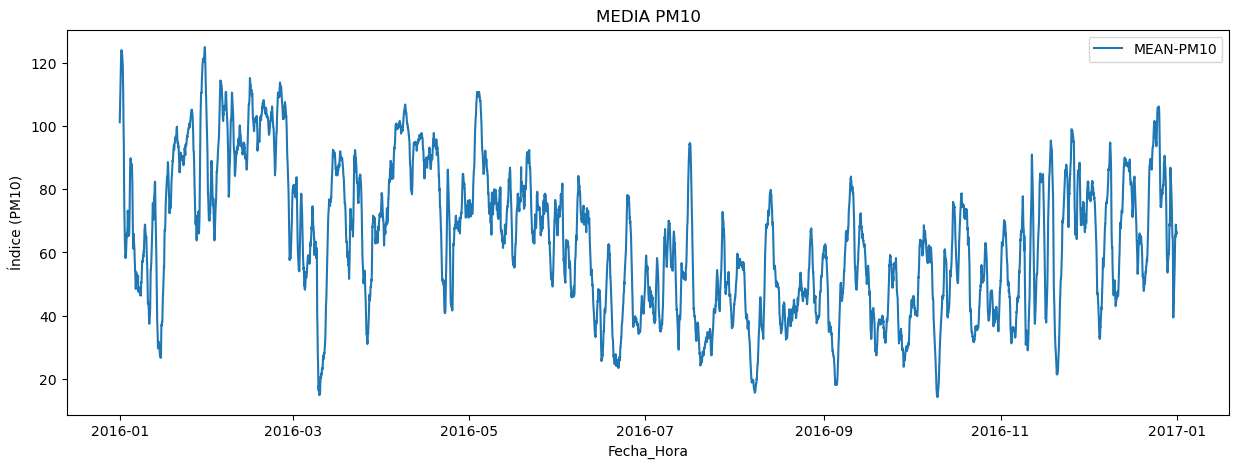

In [28]:

plot_time_series(df, 'PM10',['MEAN'], 'Índice (PM10)', 'MEDIA PM10', start_date='2016-01-01', end_date='2016-12-31')

In [29]:
def calculate_averages(df, start_date, end_date, columns, freq='D'):
    """
    Calcula los promedios de las zonas para las columnas especificadas en un rango de fechas específico.
    
    Parámetros:
    df (DataFrame): El DataFrame con los datos.
    start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'.
    end_date (str): Fecha de fin en formato 'YYYY-MM-DD'.
    columns (list): Lista de columnas a promediar.
    freq (str): Frecuencia para agrupar los datos ('D' para día, 'W' para semana, 'M' para mes).
    
    Retorna:
    DataFrame: Un DataFrame con los promedios calculados.
    """
    
    # Filtrar el DataFrame por el rango de fechas
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

    # Crear DataFrame vacío para almacenar los promedios
    df_avg = pd.DataFrame()

    # Agrupar por la frecuencia especificada y calcular los promedios
    for col in columns:
        # Filtrar las columnas del DataFrame que contienen el nombre de la variable especificada (col)
        zone_columns = [c for c in df_filtered.columns if col in c]
        # Resamplear (reagrupar) los datos según la frecuencia especificada y calcular la media
        df_avg[f'{col}'] = df_filtered[zone_columns].resample(freq).mean().mean(axis=1, skipna=True)
    
    # Retornar el DataFrame con los promedios calculados
    return df_avg



In [30]:
col = 'CE-CO'
df_avg = calculate_averages(df, start_date='2016-01-01', end_date='2016-12-31', columns=[col], freq='D')
df_avg

,CE-CO
Fecha_Hora,
2016-01-01,12.625000
2016-01-02,7.000000
2016-01-03,9.208333
2016-01-04,10.291667
2016-01-05,15.111111
...,...
2016-12-27,9.416667
2016-12-28,6.958333
2016-12-29,6.166667


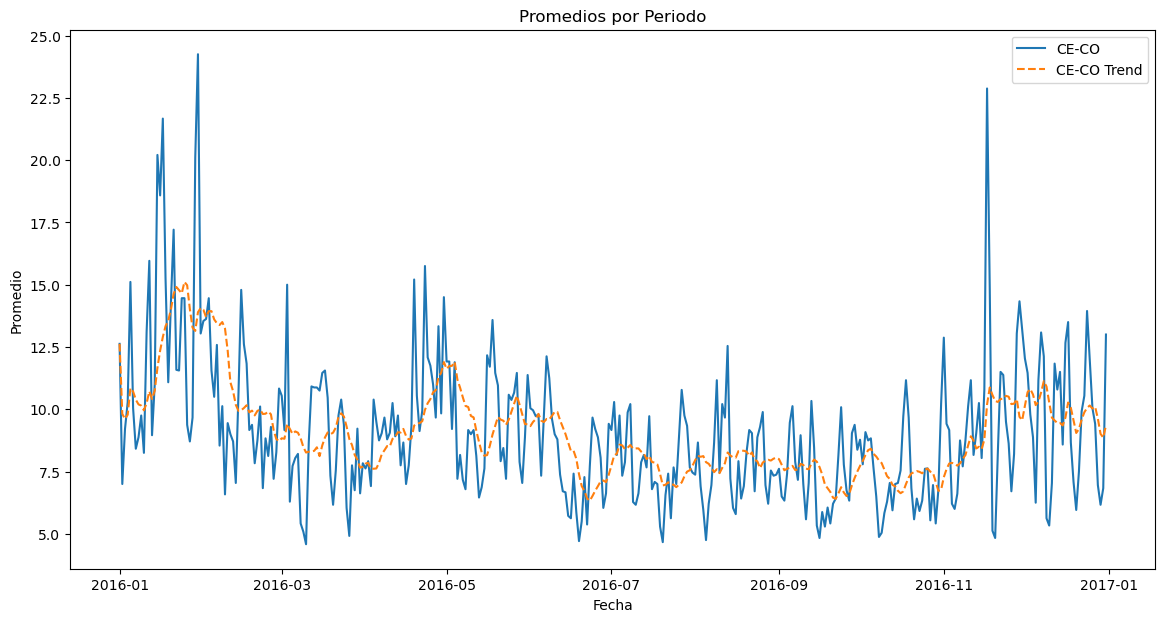

In [31]:
# Calcular la media móvil (tendencia) con una ventana de 12 periodos para cada columna y agregarlo al DataFrame
df_avg[f'{col}-trend'] = df_avg[col].rolling(window=12, min_periods=1).mean()

# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(14, 7))

# Graficar la serie de tiempo original de la columna
plt.plot(df_avg.index, df_avg[col], label=col)

# Graficar la serie de tiempo de la tendencia (media móvil) con una línea discontinua
plt.plot(df_avg.index, df_avg[f'{col}-trend'], linestyle='--', label=f'{col} Trend')

# Título del gráfico
plt.title('Promedios por Periodo')

# Etiqueta del eje x
plt.xlabel('Fecha')

# Etiqueta del eje y
plt.ylabel('Promedio')

# Mostrar la leyenda del gráfico
plt.legend()

# Mostrar el gráfico
plt.show()


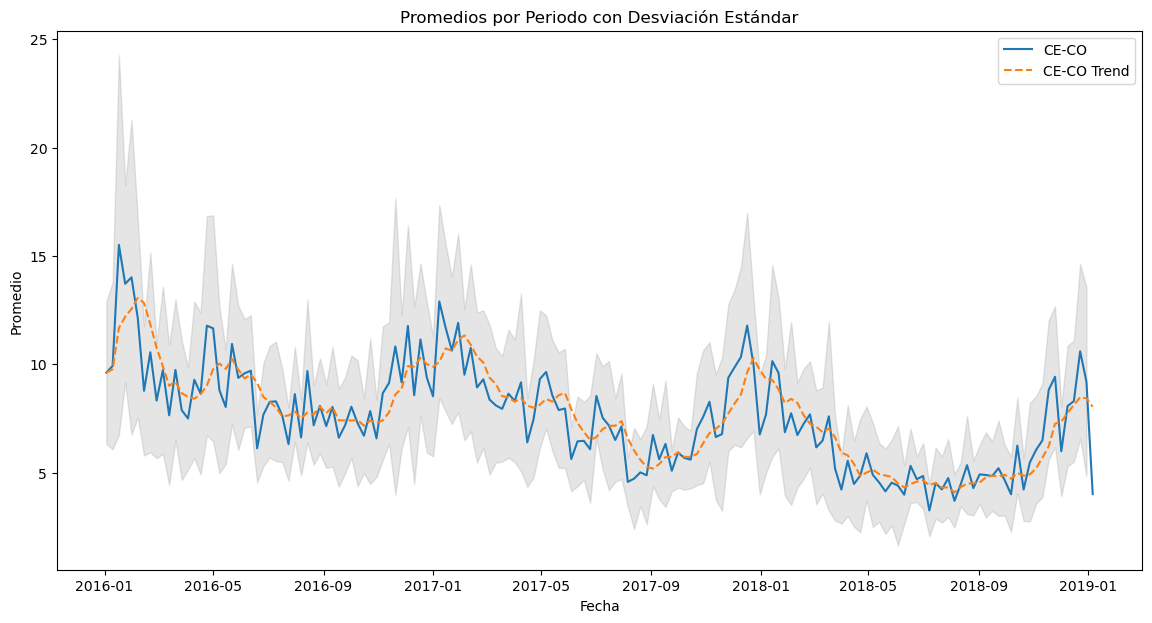

In [32]:
# Función para calcular los promedios y desviaciones estándar
def calculate_averages_and_std(df, start_date, end_date, columns, freq='D'):
    """
    Calcula los promedios y desviaciones estándar de las zonas para las columnas especificadas en un rango de fechas específico.
    
    Parámetros:
    df (DataFrame): El DataFrame con los datos.
    start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'.
    end_date (str): Fecha de fin en formato 'YYYY-MM-DD'.
    columns (list): Lista de columnas a promediar.
    freq (str): Frecuencia para agrupar los datos ('D' para día, 'W' para semana, 'M' para mes).
    
    Retorna:
    DataFrame: Un DataFrame con los promedios y desviaciones estándar calculados.
    """
    
    # Filtrar el DataFrame por el rango de fechas
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

    # Crear DataFrames vacíos para almacenar los promedios y desviaciones estándar
    df_avg = pd.DataFrame()
    df_std = pd.DataFrame()

    # Agrupar por la frecuencia especificada y calcular los promedios y desviaciones estándar
    for col in columns:
        # Filtrar las columnas del DataFrame que contienen el nombre de la variable especificada (col)
        zone_columns = [c for c in df_filtered.columns if col in c]
        # Resamplear (reagrupar) los datos según la frecuencia especificada y calcular la media
        df_avg[f'{col}'] = df_filtered[zone_columns].resample(freq).mean().mean(axis=1, skipna=True)
        # Resamplear (reagrupar) los datos según la frecuencia especificada y calcular la desviación estándar
        df_std[f'{col}'] = df_filtered[zone_columns].resample(freq).std().mean(axis=1, skipna=True)
    
    # Retornar los DataFrames con los promedios y desviaciones estándar calculados
    return df_avg, df_std

# Definir la columna a analizar
col = 'CE-CO'

# Calcular los promedios y desviaciones estándar para la columna especificada en el rango de fechas y frecuencia dada
df_avg, df_std = calculate_averages_and_std(df, start_date='2016-01-01', end_date='2018-12-31', columns=[col], freq='W')

# Calcular la tendencia usando una media móvil con ventana de 5 periodos
df_avg[f'{col}-trend'] = df_avg[col].rolling(window=5, min_periods=1).mean()

# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(14, 7))

# Graficar los promedios de la columna
plt.plot(df_avg.index, df_avg[col], label=col)

# Graficar la tendencia con una línea discontinua
plt.plot(df_avg.index, df_avg[f'{col}-trend'], linestyle='--', label=f'{col} Trend')

# Agregar banda de desviación estándar (área sombreada)
plt.fill_between(df_avg.index, df_avg[col] - df_std[col], df_avg[col] + df_std[col], color='gray', alpha=0.2)

# Título del gráfico
plt.title('Promedios por Periodo con Desviación Estándar')

# Etiqueta del eje x
plt.xlabel('Fecha')

# Etiqueta del eje y
plt.ylabel('Promedio')

# Mostrar la leyenda del gráfico
plt.legend()

# Mostrar el gráfico
plt.show()


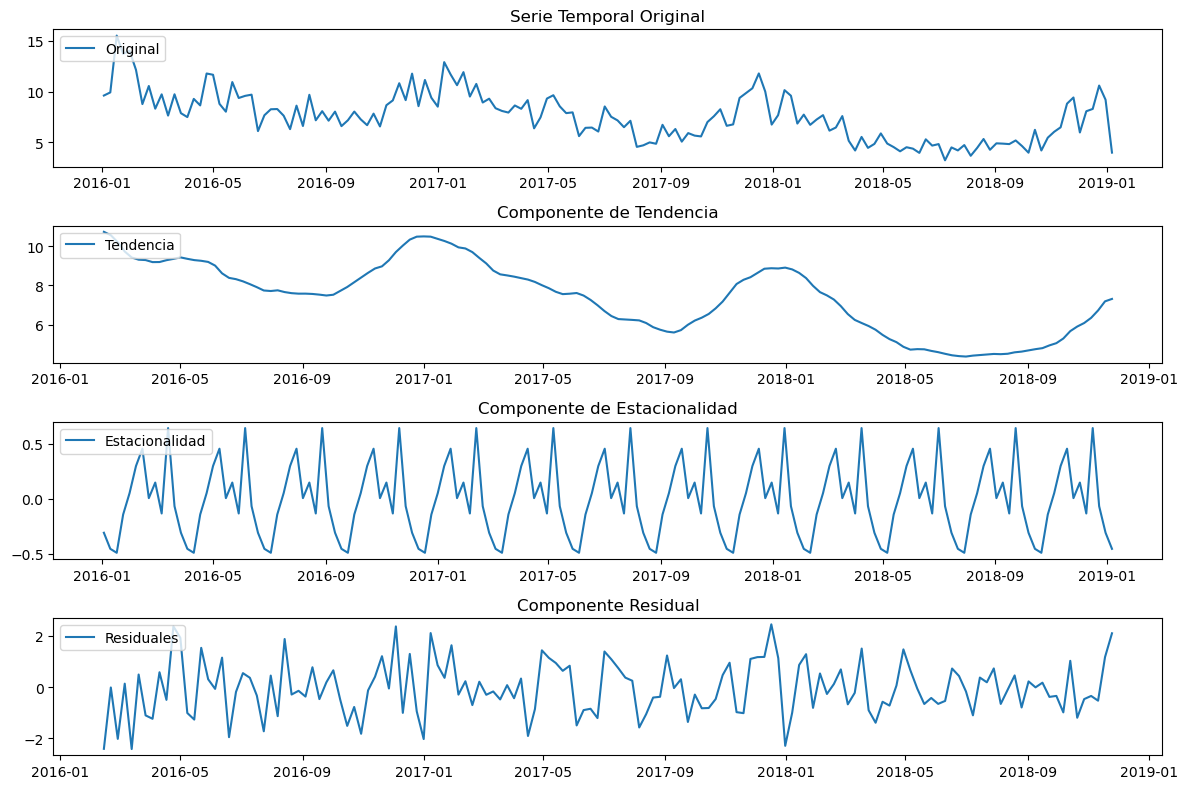

In [33]:
# Descomponer la serie temporal
decomposition = seasonal_decompose(df_avg['CE-CO'], model='additive', period=12)

# Graficar los componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_avg['CE-CO'], label='Original')
plt.legend(loc='upper left')
plt.title('Serie Temporal Original')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.title('Componente de Tendencia')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.title('Componente de Estacionalidad')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuales')
plt.legend(loc='upper left')
plt.title('Componente Residual')

plt.tight_layout()
plt.show()

In [34]:
def calculate_hourly_boxplot(df, start_date, end_date, columns):
    """
    Calcula los promedios y desviaciones estándar de las zonas para las columnas especificadas en un rango de fechas específico por hora y genera una gráfica de cajas y bigotes.
    
    Parámetros:
    df (DataFrame): El DataFrame con los datos.
    start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'.
    end_date (str): Fecha de fin en formato 'YYYY-MM-DD'.
    columns (list): Lista de columnas a promediar.
    
    Retorna:
    None: Genera una gráfica de cajas y bigotes.
    """
    
    # Filtrar el DataFrame por el rango de fechas
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

    # Crear un DataFrame solo con las columnas relevantes
    df_hourly = df_filtered[['Hora'] + columns]

    # Derretir el DataFrame para que sea apto para Seaborn
    df_hourly_melted = df_hourly.melt(id_vars=['Hora'], value_vars=columns, var_name='Variable', value_name='Valor')

    # Calcular la media por hora y variable
    df_means = df_hourly.groupby('Hora')[columns].mean().reset_index()

    # Graficar con Seaborn
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Hora', y='Valor', data=df_hourly_melted, showfliers=True)
    
    # Añadir la línea de media al gráfico
    for col in columns:
        sns.lineplot(x='Hora', y=col, data=df_means, label=f'Media {col}' , color = 'r')

    plt.title('Concentración por hora')
    plt.xlabel('Hora del día')
    plt.ylabel('Concentración')
    plt.legend()
    plt.show()


c:\Users\Marcos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marcos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


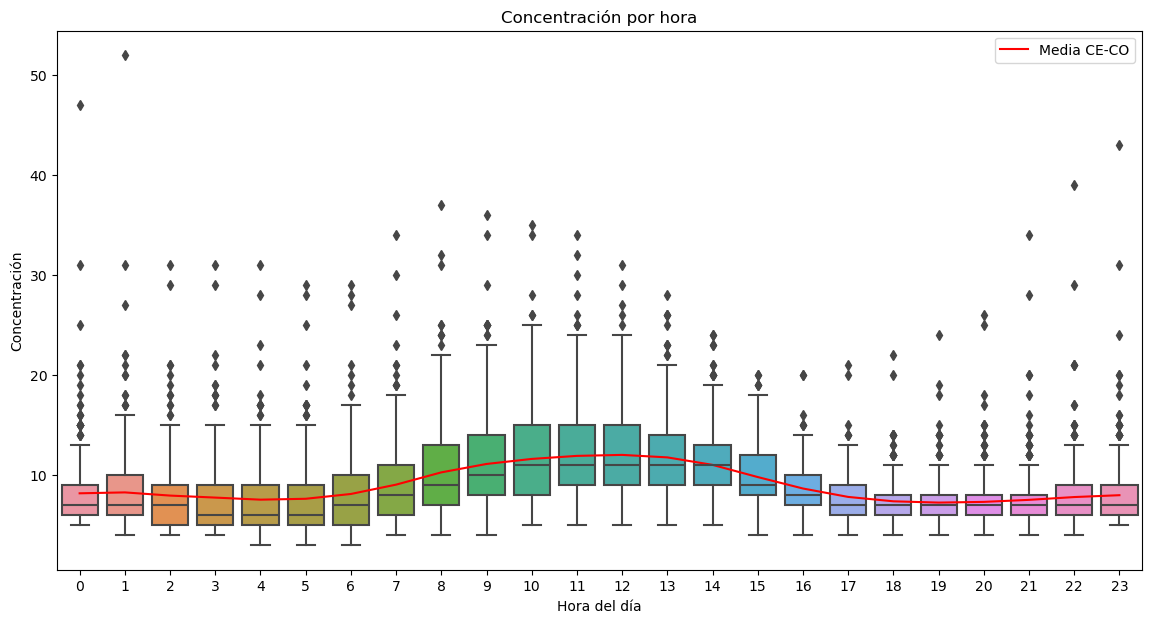

In [35]:
calculate_hourly_boxplot(df, start_date='2016-01-01', end_date='2016-12-31', columns=['CE-CO'])

In [36]:
def calculate_weekly_boxplot(df, start_date, end_date, columns):
    """
    Calcula los promedios y desviaciones estándar de las zonas para las columnas especificadas en un rango de fechas específico por día de la semana y genera una gráfica de cajas y bigotes.
    
    Parámetros:
    df (DataFrame): El DataFrame con los datos.
    start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'.
    end_date (str): Fecha de fin en formato 'YYYY-MM-DD'.
    columns (list): Lista de columnas a promediar.
    
    Retorna:
    None: Genera una gráfica de cajas y bigotes.
    """
    
    # Filtrar el DataFrame por el rango de fechas
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)].copy()

    # Agregar columna de día de la semana
    df_filtered['Día de la semana'] = df_filtered.index.day_name()

    # Crear un DataFrame solo con las columnas relevantes
    df_weekly = df_filtered[['Día de la semana'] + columns]

    # Derretir el DataFrame para que sea apto para Seaborn
    df_weekly_melted = df_weekly.melt(id_vars=['Día de la semana'], value_vars=columns, var_name='Variable', value_name='Valor')

    # Calcular la media por día de la semana y variable
    df_means = df_weekly.groupby('Día de la semana')[columns].mean().reset_index()

    # Ordenar los días de la semana
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_means['Día de la semana'] = pd.Categorical(df_means['Día de la semana'], categories=order, ordered=True)
    df_means = df_means.sort_values('Día de la semana')

    # Graficar con Seaborn
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Día de la semana', y='Valor', data=df_weekly_melted, order=order, showfliers=False)

    # Añadir la línea de media al gráfico
    for col in columns:
        sns.lineplot(x='Día de la semana', y=col, data=df_means, label=f'Media {col}',color='r')

    plt.title('Concentración por día de la semana')
    plt.xlabel('Día de la semana')
    plt.ylabel('Concentración')
    plt.legend()
    plt.show()


c:\Users\Marcos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marcos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


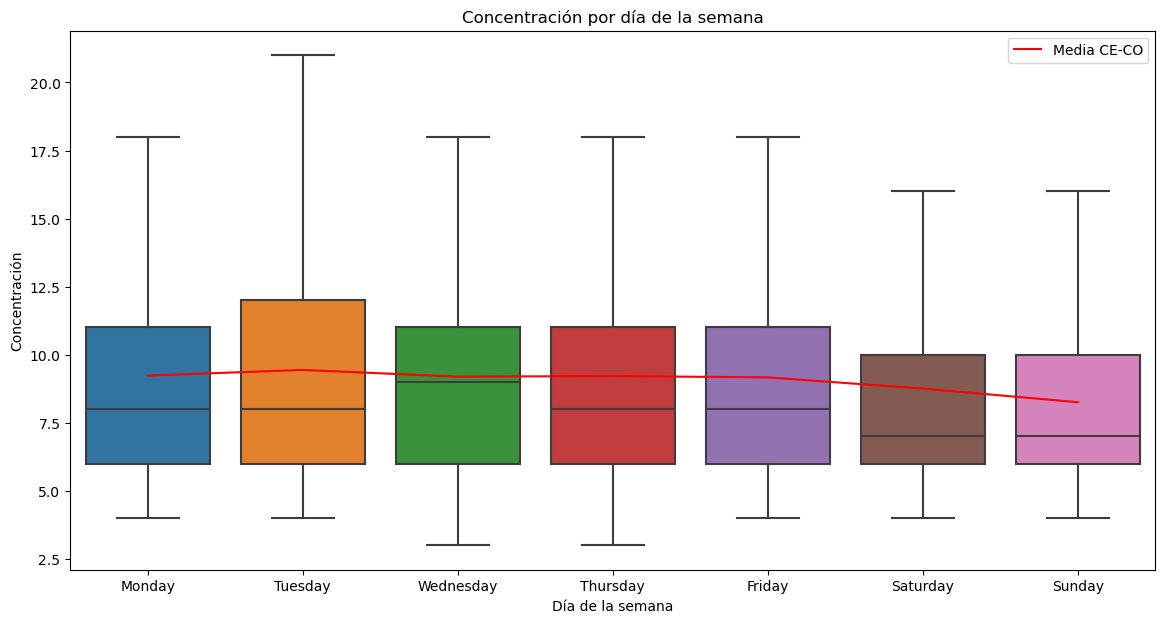

In [37]:
calculate_weekly_boxplot(df, start_date='2016-01-01', end_date='2016-12-31', columns=['CE-CO'])

In [38]:
# Definir los intervalos y colores según las tablas proporcionadas
intervalos = [
    (0, 50, '#9ACA3C'),     # Intervalo 0-50 con color verde
    (51, 100, '#F7EC0F'),   # Intervalo 51-100 con color amarillo
    (101, 150, '#F8991D'),  # Intervalo 101-150 con color naranja
    (151, 200, '#ED2124'),  # Intervalo 151-200 con color rojo
    (201, 300, '#7D287D'),  # Intervalo 201-300 con color morado
    (301, 500, '#7E0023')   # Intervalo 301-500 con color marrón oscuro
]

# Función para obtener el color basado en el valor
def obtener_color(valor):
    for intervalo in intervalos:
        if intervalo[0] <= valor <= intervalo[1]:
            return intervalo[2]
    return '#000000'  # Negro por defecto si el valor no encaja en ningún intervalo

# Función para graficar series de tiempo con puntos coloreados según los intervalos
def plot_time_series_points(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    # Filtrar el DataFrame por el rango de fechas si se proporcionan fechas de inicio y fin
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    # Iterar sobre cada zona especificada en la lista de zonas
    for zone in zones:
        # Crear el nombre de la columna combinando la zona y la variable
        column = f"{zone}-{variable}"
        
        # Verificar si la columna existe en el DataFrame
        if (column in df.columns):
            # Aplicar la función obtener_color a cada valor de la columna para obtener los colores correspondientes
            colors = df[column].apply(obtener_color)
            # Graficar los puntos con los colores obtenidos
            plt.scatter(df.index, df[column], c=colors, label=column)
        else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha_Hora')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()


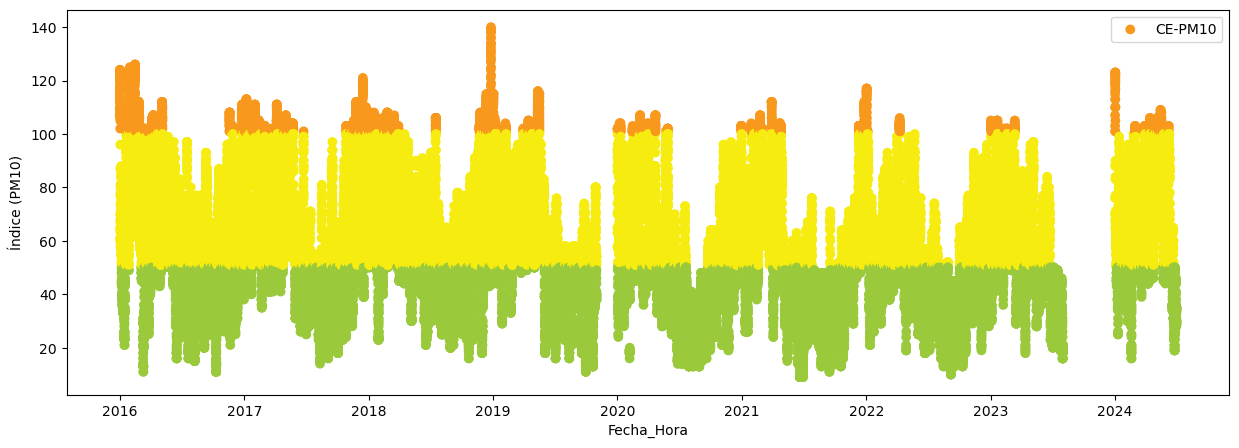

In [39]:
zones_to_plot = ['CE']
plot_time_series_points(df, 'PM10', zones_to_plot, 'Índice (PM10)', '', start_date='2016-01-01', end_date='2024-12-31')

# 3. Imputación de valores faltantes

### Metodo 1

Primeras filas del DataFrame filtrado:
                     CE-CO  CE-PM10
Fecha_Hora                         
2016-01-01 00:00:00   16.0    107.0
2016-01-01 01:00:00   17.0    107.0
2016-01-01 02:00:00   18.0    109.0
2016-01-01 03:00:00   19.0    110.0
2016-01-01 04:00:00   17.0    112.0


<Figure size 1200x600 with 0 Axes>

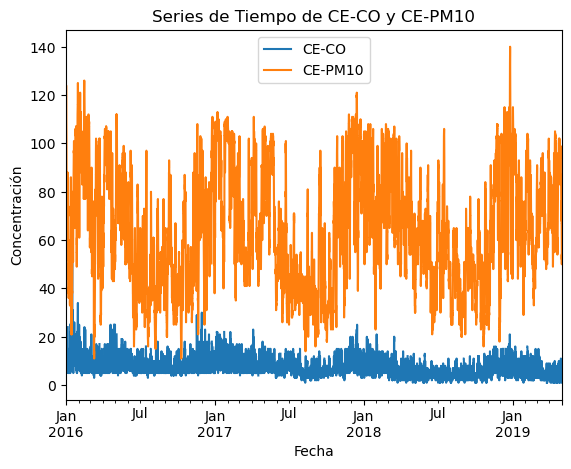


Número de valores nulos antes de la imputación:
CE-CO      1224
CE-PM10       0
dtype: int64

Primeras filas del DataFrame después de la imputación y adición de columnas:
                     CE-CO  CE-PM10  julian_day  hour
Fecha_Hora                                           
2016-01-01 00:00:00   16.0    107.0           1     0
2016-01-01 01:00:00   17.0    107.0           1     1
2016-01-01 02:00:00   18.0    109.0           1     2
2016-01-01 03:00:00   19.0    110.0           1     3
2016-01-01 04:00:00   17.0    112.0           1     4

Número de valores nulos después de la imputación:
CE-CO         0
CE-PM10       0
julian_day    0
hour          0
dtype: int64


<Figure size 1200x600 with 0 Axes>

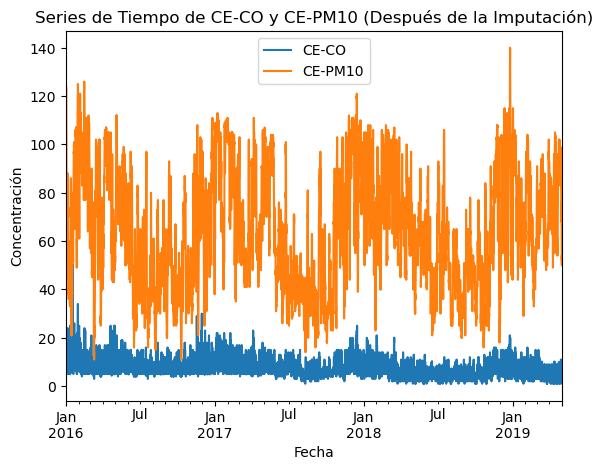

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
df_impute = df[['CE-CO', 'CE-PM10']].loc['2016-01-01':'2019-05-01']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
df_impute.plot()
plt.title('Series de Tiempo de CE-CO y CE-PM10')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())

# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = imputer_knn.fit_transform(df_impute)

# Agregar una columna con el día juliano (día del año)
df_impute['julian_day'] = df_impute.index.dayofyear

# Agregar una columna con la hora del día
df_impute['hour'] = df_impute.index.hour

# Mostrar las primeras filas del DataFrame después de la imputación y adición de columnas
print("\nPrimeras filas del DataFrame después de la imputación y adición de columnas:")
print(df_impute.head())

# Contar y mostrar el número de valores nulos después de la imputación
print("\nNúmero de valores nulos después de la imputación:")
print(df_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después de la imputación
plt.figure(figsize=(12, 6))
df_impute[['CE-CO', 'CE-PM10']].plot()
plt.title('Series de Tiempo de CE-CO y CE-PM10 (Después de la Imputación)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()


### Metodo 2

Primeras filas del DataFrame filtrado:
                     CE-CO  CE-PM10
Fecha_Hora                         
2016-01-01 00:00:00   16.0    107.0
2016-01-01 01:00:00   17.0    107.0
2016-01-01 02:00:00   18.0    109.0
2016-01-01 03:00:00   19.0    110.0
2016-01-01 04:00:00   17.0    112.0


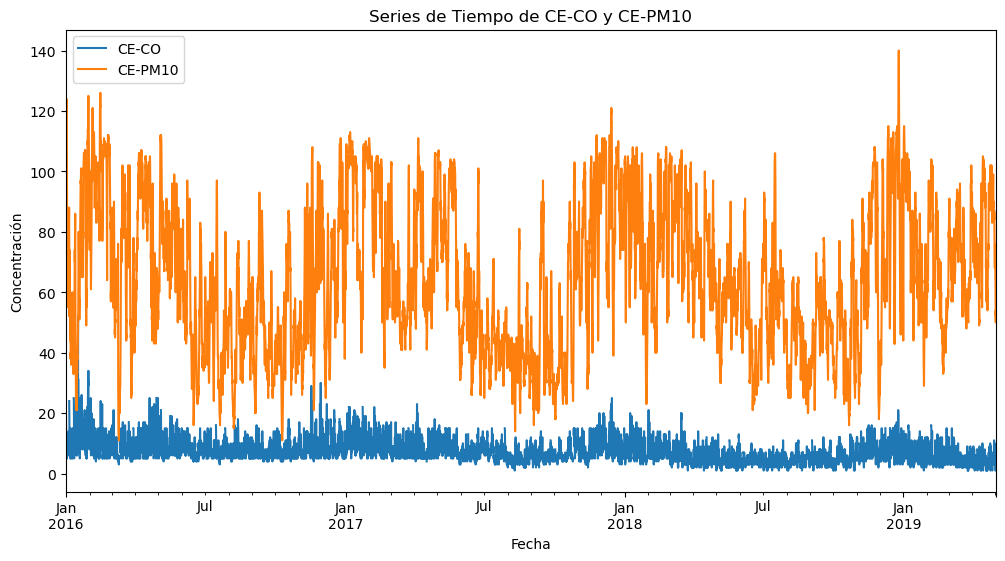


Número de valores nulos antes de la imputación:
CE-CO      1224
CE-PM10       0
dtype: int64

Primeras filas del DataFrame después de la interpolación y adición de columnas:
                     CE-CO  CE-PM10  julian_day  hour
Fecha_Hora                                           
2016-01-01 00:00:00   16.0    107.0           1     0
2016-01-01 01:00:00   17.0    107.0           1     1
2016-01-01 02:00:00   18.0    109.0           1     2
2016-01-01 03:00:00   19.0    110.0           1     3
2016-01-01 04:00:00   17.0    112.0           1     4

Número de valores nulos después de la interpolación:
CE-CO         0
CE-PM10       0
julian_day    0
hour          0
dtype: int64


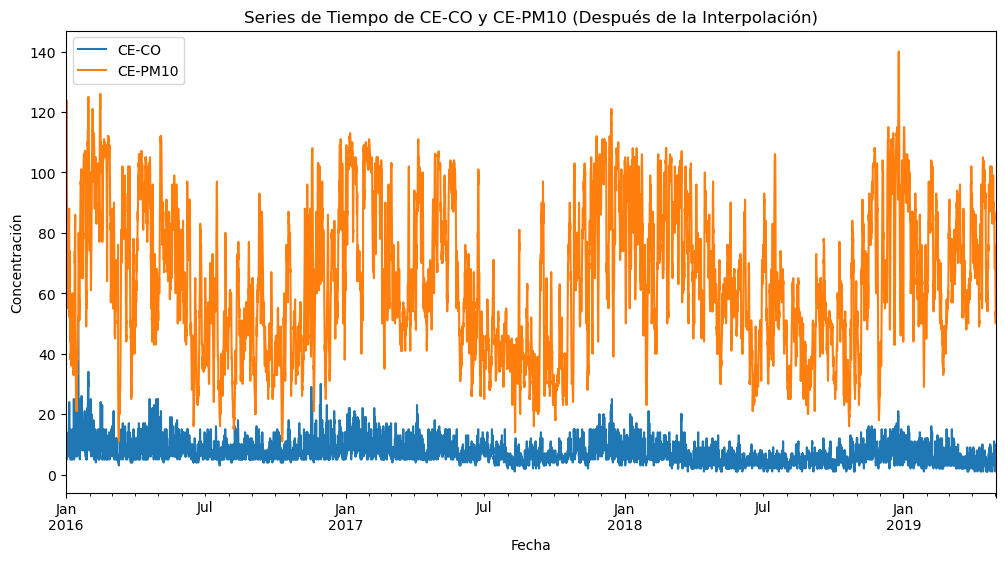

In [41]:

# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
df_impute = df[['CE-CO', 'CE-PM10']].loc['2016-01-01':'2019-05-01']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
df_impute.plot(ax=plt.gca())
plt.title('Series de Tiempo de CE-CO y CE-PM10')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())

# Aplicar interpolación para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = df_impute.interpolate(method='time')

# Agregar una columna con el día juliano (día del año)
df_impute['julian_day'] = df_impute.index.dayofyear

# Agregar una columna con la hora del día
df_impute['hour'] = df_impute.index.hour

# Mostrar las primeras filas del DataFrame después de la interpolación y adición de columnas
print("\nPrimeras filas del DataFrame después de la interpolación y adición de columnas:")
print(df_impute.head())

# Contar y mostrar el número de valores nulos después de la interpolación
print("\nNúmero de valores nulos después de la interpolación:")
print(df_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después de la interpolación
plt.figure(figsize=(12, 6))
df_impute[['CE-CO', 'CE-PM10']].plot(ax=plt.gca())
plt.title('Series de Tiempo de CE-CO y CE-PM10 (Después de la Interpolación)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()


### Metodo 3

Primeras filas del DataFrame filtrado:
                     CE-CO  CE-PM10
Fecha_Hora                         
2016-01-01 00:00:00   16.0    107.0
2016-01-01 01:00:00   17.0    107.0
2016-01-01 02:00:00   18.0    109.0
2016-01-01 03:00:00   19.0    110.0
2016-01-01 04:00:00   17.0    112.0


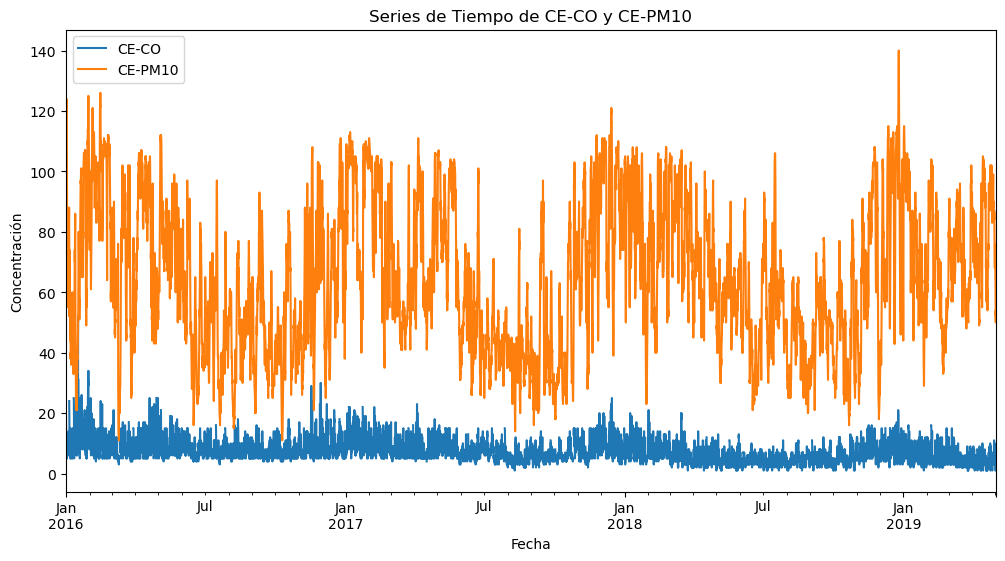


Número de valores nulos antes de la imputación:
CE-CO      1224
CE-PM10       0
dtype: int64

Primeras filas del DataFrame después del promedio móvil y adición de columnas:
                     CE-CO  CE-PM10  julian_day  hour
Fecha_Hora                                           
2016-01-01 00:00:00   16.0    107.0           1     0
2016-01-01 01:00:00   17.0    107.0           1     1
2016-01-01 02:00:00   18.0    109.0           1     2
2016-01-01 03:00:00   19.0    110.0           1     3
2016-01-01 04:00:00   17.0    112.0           1     4

Número de valores nulos después del promedio móvil:
CE-CO         0
CE-PM10       0
julian_day    0
hour          0
dtype: int64


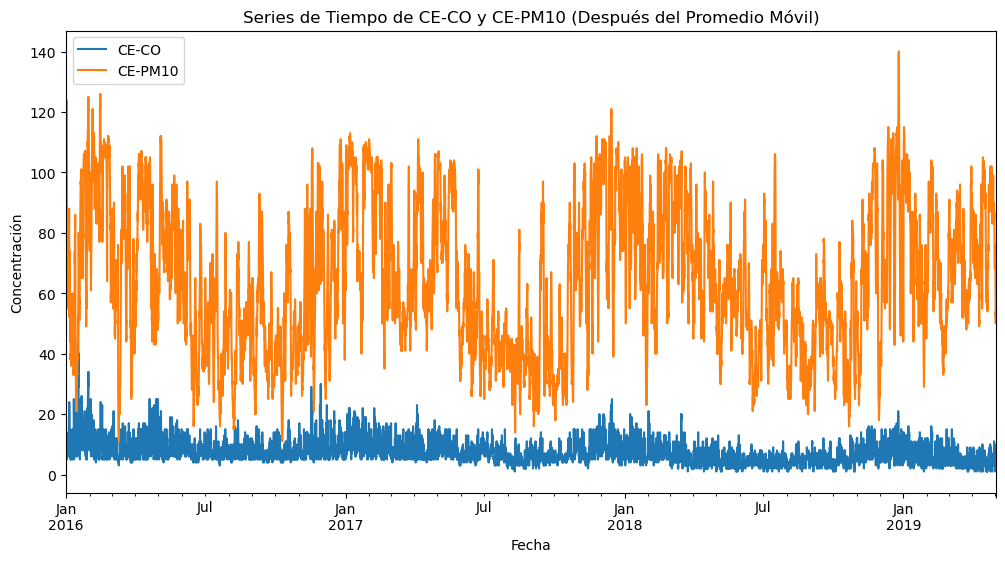

In [42]:
# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
df_impute = df[['CE-CO', 'CE-PM10']].loc['2016-01-01':'2019-05-01']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
df_impute.plot(ax=plt.gca())
plt.title('Series de Tiempo de CE-CO y CE-PM10')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())

# Aplicar el promedio móvil para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = df_impute.fillna(df_impute.rolling(window=12, min_periods=1).mean())

# Agregar una columna con el día juliano (día del año)
df_impute['julian_day'] = df_impute.index.dayofyear

# Agregar una columna con la hora del día
df_impute['hour'] = df_impute.index.hour

# Mostrar las primeras filas del DataFrame después de la imputación y adición de columnas
print("\nPrimeras filas del DataFrame después del promedio móvil y adición de columnas:")
print(df_impute.head())

# Contar y mostrar el número de valores nulos después del promedio móvil
print("\nNúmero de valores nulos después del promedio móvil:")
print(df_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después del promedio móvil
plt.figure(figsize=(12, 6))
df_impute[['CE-CO', 'CE-PM10']].plot(ax=plt.gca())
plt.title('Series de Tiempo de CE-CO y CE-PM10 (Después del Promedio Móvil)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()


# 4. Filtrado de valores faltantes

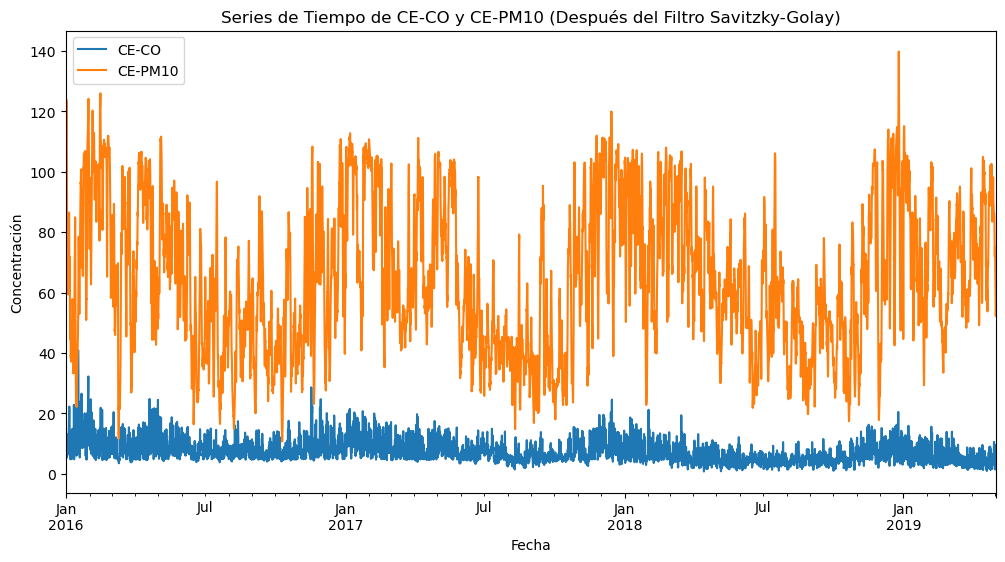

In [44]:
from scipy.signal import savgol_filter

# Copiar el DataFrame para aplicar diferentes filtros
df_filtered_savgol = df_impute.copy()


# Aplicar el filtro Savitzky-Golay para suavizar los datos
window_length = 13  # El tamaño de la ventana debe ser un número impar
polyorder = 3       # El orden del polinomio
df_filtered_savgol['CE-CO'] = savgol_filter(df_filtered_savgol['CE-CO'], window_length=window_length, polyorder=polyorder)
df_filtered_savgol['CE-PM10'] = savgol_filter(df_filtered_savgol['CE-PM10'], window_length=window_length, polyorder=polyorder)


# Graficar las series de tiempo después de aplicar el filtro Savitzky-Golay
plt.figure(figsize=(12, 6))
df_filtered_savgol[['CE-CO', 'CE-PM10']].plot(ax=plt.gca())
plt.title('Series de Tiempo de CE-CO y CE-PM10 (Después del Filtro Savitzky-Golay)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()





In [45]:
df_filtered_savgol.to_csv('Datos_procesados.csv',index=False)

# Aplicando Redes Neuronales Recurrentes

In [ ]:
%pip install 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras import backend as K


def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2):
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [ ]:
# Paso 1: Leer el archivo CSV
file_path = 'Datos_procesados.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")


In [ ]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 12
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CE-CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CE-CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)


In [ ]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

In [ ]:
# Crear y entrenar el modelo LSTM
model_lstm = create_lstm_model(input_shape, output_size, future_steps)
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_lstm)

In [ ]:
# Crear y entrenar el modelo GRU
model_gru = create_gru_model(input_shape, output_size, future_steps)
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_gru)

In [ ]:
# Evaluar los modelos en el conjunto de evaluación
loss_simple_rnn, rmse_simple_rnn = model_simple_rnn.evaluate(X_eval, y_eval)
print(f"SimpleRNN - Loss en el conjunto de evaluación: {loss_simple_rnn}")
print(f"SimpleRNN - RMSE en el conjunto de evaluación: {rmse_simple_rnn}")

loss_lstm, rmse_lstm = model_lstm.evaluate(X_eval, y_eval)
print(f"LSTM - Loss en el conjunto de evaluación: {loss_lstm}")
print(f"LSTM - RMSE en el conjunto de evaluación: {rmse_lstm}")

loss_gru, rmse_gru = model_gru.evaluate(X_eval, y_eval)
print(f"GRU - Loss en el conjunto de evaluación: {loss_gru}")
print(f"GRU - RMSE en el conjunto de evaluación: {rmse_gru}")

In [ ]:
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

In [ ]:
# Visualizar predicciones y errores para el modelo LSTM
plot_final_prediction(model_lstm, X_eval, y_eval, scalers, output_columns, future_steps, title='LSTM - Predicciones en el conjunto de evaluación')
plot_final_errors(model_lstm, X_eval, y_eval, scalers, output_columns, future_steps, title='LSTM - Errores en el conjunto de evaluación')

In [ ]:


# Visualizar predicciones y errores para el modelo GRU
plot_final_prediction(model_gru, X_eval, y_eval, scalers, output_columns, future_steps, title='GRU - Predicciones en el conjunto de evaluación')
plot_final_errors(model_gru, X_eval, y_eval, scalers, output_columns, future_steps, title='GRU - Errores en el conjunto de evaluación')



In [ ]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}
    
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

In [ ]:
model_simple_rnn.save('model_rnn.keras')
model_gru.save('model_gru.keras')
model_lstm.save('model_lstm.keras')

import joblib
import os

def save_scalers(scalers, directory):
    """
    Guarda los escaladores en archivos separados.

    Args:
        scalers (dict): Diccionario de escaladores.
        directory (str): Directorio donde se guardarán los escaladores.
    """
    # Crear el directorio si no existe
    os.makedirs(directory, exist_ok=True)
    
    # Guardar cada escalador en un archivo separado
    for column, scaler in scalers.items():
        file_path = os.path.join(directory, f'{column}_scaler.pkl')
        joblib.dump(scaler, file_path)
        print(f"Escalador para {column} guardado en {file_path}")


save_scalers(scalers, 'scalers')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import backend as K
import joblib
import os

# Cargar el archivo CSV
file_path = 'Datos_procesados.csv'
df = pd.read_csv(file_path)

# Definición de funciones

def load_scalers(directory, columns):
    """
    Carga los escaladores desde archivos separados.

    Args:
        directory (str): Directorio desde donde se cargarán los escaladores.
        columns (list): Lista de nombres de columnas para las cuales se cargan los escaladores.

    Returns:
        dict: Diccionario de escaladores cargados.
    """
    scalers = {}
    
    # Cargar cada escalador desde su archivo
    for column in columns:
        file_path = os.path.join(directory, f'{column}_scaler.pkl')
        if os.path.exists(file_path):
            scalers[column] = joblib.load(file_path)
            print(f"Escalador para {column} cargado desde {file_path}")
        else:
            print(f"No se encontró el archivo {file_path} para {column}")
    
    return scalers

def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps, scalers):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        scalers (dict): Diccionario de escaladores.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()

# Cargar los escaladores
columns = df.columns
loaded_scalers = load_scalers('scalers', columns)

# Cargar el modelo entrenado
model = tf.keras.models.load_model('model_rnn.keras', custom_objects={'rmse': rmse})

# Definir parámetros
time_steps = 24
future_steps = 12
input_columns = ['CE-CO', 'CE-PM10', 'julian_day', 'hour']
output_columns = ['CE-CO']
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model, df, input_columns, output_columns, time_steps, future_steps, loaded_scalers)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)


## En desarrollo


In [ ]:


def calculate_nowcast(data, window=12):
    """
    Calcula el nowcast basado en una ventana móvil sobre los datos de concentración.

    Args:
        data (pd.Series): Serie temporal de datos de concentración.
        window (int, optional): Tamaño de la ventana móvil. Por defecto es 12.

    Returns:
        np.ndarray: Arreglo con los valores de nowcast calculados.
    """
    # Inicializar el arreglo de nowcast con NaN
    nowcast = np.full(len(data), np.nan, dtype=np.float16)
    
    # Iterar sobre los datos comenzando desde el índice 'window - 1'
    for i in range(window - 1, len(data)):
        # Obtener los datos de la ventana actual
        window_data = data.iloc[i - window + 1:i + 1].to_numpy()
        
        # Calcular el valor máximo y mínimo de la ventana
        C_max = np.nanmax(window_data)
        C_min = np.nanmin(window_data)
        
        # Calcular el peso 'w' basado en la diferencia entre el máximo y el mínimo
        w = 1 - (C_max - C_min) / C_max if C_max != 0 else 0
        
        # Ajustar el peso 'W' para que no sea menor a 0.5
        W = w if w > 0.5 else 0.5
        
        # Calcular los pesos para cada valor en la ventana
        weights = np.where(~np.isnan(window_data), W ** np.arange(window), 0)
        
        # Sumar los pesos, ignorando los NaN
        weights_sum = np.nansum(weights)
        
        # Si en los últimos tres valores de la ventana hay como máximo dos NaN
        if np.count_nonzero(np.isnan(window_data[-3:])) <= 2:
            # Calcular el nowcast como la media ponderada de los valores en la ventana
            nowcast[i] = np.round(np.nansum(window_data * weights) / weights_sum)
    
    return nowcast

# Lista de concentraciones
concentraciones = [13, np.nan, 10, 21, 74, 64, 53, 82, 90, 75, 80, 50]

# Convertir la lista en una Serie de pandas
concentraciones_series = pd.Series(concentraciones)

# Aplicar la función calculate_nowcast
nowcast_result = calculate_nowcast(concentraciones_series)

# Mostrar los resultados
print(nowcast_result)



In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame ficticio
np.random.seed(42)
data = {
    'Fecha': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Variable1': np.random.randn(100),
    'Variable2': np.random.randn(100),
    'Variable3': np.random.randn(100)
}

df = pd.DataFrame(data)

# Introducir valores faltantes
df.loc[df.sample(frac=0.1).index, 'Variable1'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Variable2'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Variable3'] = np.nan

print(df.head(10))
df_media = df.copy()
df_media['Variable1'] = df_media['Variable1'].fillna(df_media['Variable1'].mean())
df_media['Variable2'] = df_media['Variable2'].fillna(df_media['Variable2'].mean())
df_media['Variable3'] = df_media['Variable3'].fillna(df_media['Variable3'].mean())


In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.impute import KNNImputer

df_knn = df.copy()
imputer_knn = KNNImputer(n_neighbors=5)
df_knn.iloc[:, 1:] = imputer_knn.fit_transform(df_knn.iloc[:, 1:])
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice = df.copy()
imputer_mice = IterativeImputer()
df_mice.iloc[:, 1:] = imputer_mice.fit_transform(df_mice.iloc[:, 1:])


In [ ]:
def summary_statistics(df, method):
    summary = df.describe().T[['mean', 'std']]
    summary['method'] = method
    return summary

summary_original = summary_statistics(df.dropna(), 'Original')
summary_media = summary_statistics(df_media, 'Media')
summary_knn = summary_statistics(df_knn, 'KNN')
summary_mice = summary_statistics(df_mice, 'MICE')

summary_df = pd.concat([summary_original, summary_media, summary_knn, summary_mice])
print(summary_df)
